# Strategic Challenge 2022

### Bain&Company




### Team Flat101
### Authors:
##### [Adney Costa](https://www.linkedin.com/in/adney-costa-moura-7310531b7/)
##### [Matheus Oliveira](https://www.linkedin.com/in/matheusoliveira12/)
##### [Nívea de Abreu](https://www.linkedin.com/in/niveaabreu/)
##### [Ricardo Mourão](https://www.linkedin.com/in/ricardo-mour%C3%A3o-rodrigues-filho-0b75441b9/)

# Project Assigment

The main goal of this Assignment is to create a model that predicts the land area destinated to the plantation of main
agricultural crops and to pastures for livestock, in the state of Pará.
This model must be able to assess which are the priority areas (in terms of both region and product type) to invest TNC’s resources. These areas should be the most affected by the expansion of agribusiness, in terms of environmental impact.




### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
# from google.colab import files 
# uploaded = files.upload()

## Understanding the database

In [3]:
# Importing the CSV File
df = pd.read_csv('historical-database.csv', sep = ';')
df.head(10)

,year,city_code,product_type,product,destinated_area
0,01/01/1974,960b4f2c94a2fb2c,temporary,Others,"0,00"
1,01/01/1974,746cc42bfb8f6b62,temporary,Others,"0,00"
2,01/01/1974,6cce2bf873870afc,temporary,Others,"0,00"
3,01/01/1974,4de42e351006a2ae,temporary,Others,"0,00"
4,01/01/1974,5b6072f8f6d37acc,temporary,Others,"0,00"
5,01/01/1974,eac302b92f87d9ca,temporary,Others,"0,00"
6,01/01/1974,ab984377b2dc0284,temporary,Others,"0,00"
7,01/01/1974,074590cfc1c41ebf,temporary,Others,"0,00"
8,01/01/1974,0307883b5d063703,temporary,Others,"0,00"
9,01/01/1974,062ce4c17e84291e,temporary,Others,"0,00"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73744 entries, 0 to 73743
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   year             73744 non-null  object
 1   city_code        73744 non-null  object
 2   product_type     73744 non-null  object
 3   product          73744 non-null  object
 4   destinated_area  73744 non-null  object
dtypes: object(5)
memory usage: 2.8+ MB


In [5]:
# There is any null values?
df.isnull().sum()

year               0
city_code          0
product_type       0
product            0
destinated_area    0
dtype: int64

In [6]:
# Looking for the unique values in the columns
for column in df.columns:
  print(f'Column "{column}" has {len(df[column].unique())} uniques values')

Column "year" has 44 uniques values
Column "city_code" has 144 uniques values
Column "product_type" has 3 uniques values
Column "product" has 11 uniques values
Column "destinated_area" has 7154 uniques values


#### Casting the variables for ideals dtypes

To get a better understanding of the data, is a good pratice to cast, or least try, to cast the variables types to the ideal dtype of each one

In [7]:
#Convert the column "year" to time-stamp
print(f'The type of column "year" before the casting is: {df.year.dtype}')
df['year'] = pd.to_datetime(df['year'], format="%m/%d/%Y")
print(f'The type of column "year" after the casting is: {df.year.dtype}')
#Getting only the year the column for better understading
df['year'] = pd.DatetimeIndex(df['year']).year
df.head(10)

The type of column "year" before the casting is: object
The type of column "year" after the casting is: datetime64[ns]


,year,city_code,product_type,product,destinated_area
0,1974,960b4f2c94a2fb2c,temporary,Others,"0,00"
1,1974,746cc42bfb8f6b62,temporary,Others,"0,00"
2,1974,6cce2bf873870afc,temporary,Others,"0,00"
3,1974,4de42e351006a2ae,temporary,Others,"0,00"
4,1974,5b6072f8f6d37acc,temporary,Others,"0,00"
5,1974,eac302b92f87d9ca,temporary,Others,"0,00"
6,1974,ab984377b2dc0284,temporary,Others,"0,00"
7,1974,074590cfc1c41ebf,temporary,Others,"0,00"
8,1974,0307883b5d063703,temporary,Others,"0,00"
9,1974,062ce4c17e84291e,temporary,Others,"0,00"


In [8]:
#Convert the column "product_type" to categorical type
print(f'The type of column "product_type" before the casting is: {df.product_type.dtype}')
df['product_type'] = df['product_type'].astype('category')
print(f'The type of column "product_type" after the casting is: {df.product_type.dtype}')
#Getting only the year the column for better understading
df.head(10)

The type of column "product_type" before the casting is: object
The type of column "product_type" after the casting is: category


,year,city_code,product_type,product,destinated_area
0,1974,960b4f2c94a2fb2c,temporary,Others,"0,00"
1,1974,746cc42bfb8f6b62,temporary,Others,"0,00"
2,1974,6cce2bf873870afc,temporary,Others,"0,00"
3,1974,4de42e351006a2ae,temporary,Others,"0,00"
4,1974,5b6072f8f6d37acc,temporary,Others,"0,00"
5,1974,eac302b92f87d9ca,temporary,Others,"0,00"
6,1974,ab984377b2dc0284,temporary,Others,"0,00"
7,1974,074590cfc1c41ebf,temporary,Others,"0,00"
8,1974,0307883b5d063703,temporary,Others,"0,00"
9,1974,062ce4c17e84291e,temporary,Others,"0,00"


In [9]:
#Convert the column "product" to categorical type
print(f'The type of column "product" before the casting is: {df["product"].dtype}')
df['product'] = df['product'].astype('category')
print(f'The type of column "product" after the casting is: {df["product"].dtype}')
#Getting only the year the column for better understading
df.head(10)

The type of column "product" before the casting is: object
The type of column "product" after the casting is: category


,year,city_code,product_type,product,destinated_area
0,1974,960b4f2c94a2fb2c,temporary,Others,"0,00"
1,1974,746cc42bfb8f6b62,temporary,Others,"0,00"
2,1974,6cce2bf873870afc,temporary,Others,"0,00"
3,1974,4de42e351006a2ae,temporary,Others,"0,00"
4,1974,5b6072f8f6d37acc,temporary,Others,"0,00"
5,1974,eac302b92f87d9ca,temporary,Others,"0,00"
6,1974,ab984377b2dc0284,temporary,Others,"0,00"
7,1974,074590cfc1c41ebf,temporary,Others,"0,00"
8,1974,0307883b5d063703,temporary,Others,"0,00"
9,1974,062ce4c17e84291e,temporary,Others,"0,00"


In [10]:
# Looking further to the 'destinated_area' column we can see that there are some strange values as ',' in it.
df['destinated_area'].value_counts()

,            39035
0,00          5643
50,00          598
10,00          546
100,00         538
             ...  
178306,19        1
168761,17        1
153550,27        1
151607,45        1
165220,87        1
Name: destinated_area, Length: 7154, dtype: int64

In [11]:
#Dropping the conma:
conma_list = list(df[df.destinated_area==","].index)
df.drop(conma_list,inplace=True)
df['destinated_area'].value_counts()

0,00         5643
50,00         598
10,00         546
100,00        538
300,00        442
             ... 
178306,19       1
168761,17       1
153550,27       1
151607,45       1
165220,87       1
Name: destinated_area, Length: 7153, dtype: int64

In [12]:
# Replace the conma separator for '.'
df['destinated_area'] = df['destinated_area'].apply(lambda x: float(x.split()[0].replace(',', '.')))
df

,year,city_code,product_type,product,destinated_area
0,1974,960b4f2c94a2fb2c,temporary,Others,0.00
1,1974,746cc42bfb8f6b62,temporary,Others,0.00
2,1974,6cce2bf873870afc,temporary,Others,0.00
3,1974,4de42e351006a2ae,temporary,Others,0.00
4,1974,5b6072f8f6d37acc,temporary,Others,0.00
...,...,...,...,...,...
73739,2013,74d75dde6dc4a5ec,pasture,Livestock,150866.56
73740,2014,74d75dde6dc4a5ec,pasture,Livestock,152446.40
73741,2015,74d75dde6dc4a5ec,pasture,Livestock,154681.02
73742,2016,74d75dde6dc4a5ec,pasture,Livestock,164706.28


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34709 entries, 0 to 73743
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   year             34709 non-null  int64   
 1   city_code        34709 non-null  object  
 2   product_type     34709 non-null  category
 3   product          34709 non-null  category
 4   destinated_area  34709 non-null  float64 
dtypes: category(2), float64(1), int64(1), object(1)
memory usage: 1.1+ MB


## Exploratory Data Analysis 

Now lets get a further look in the database

In [14]:
# Setting a color pattern to the graphics
sns.set_style('darkgrid')

Which year has more data about?

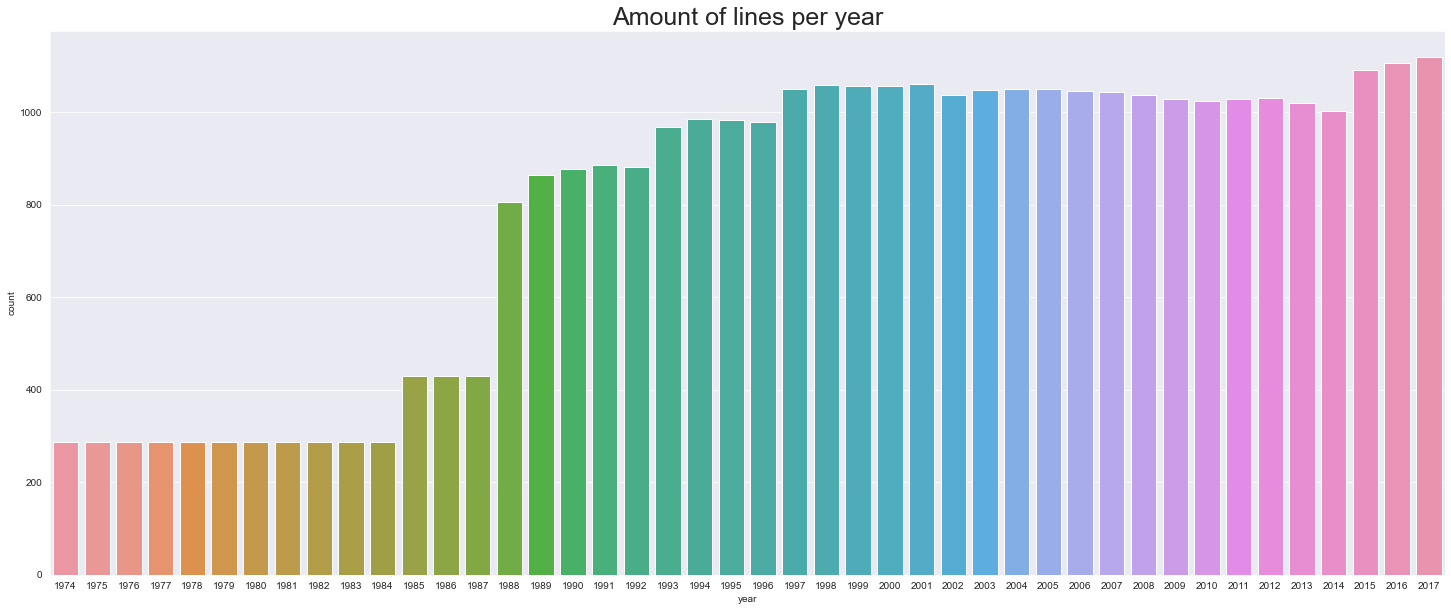

In [15]:
plt.figure(figsize=(25,10))
plt.title("Amount of lines per year",size=25)
sns.countplot(df['year']);
plt.show()

## Which is the percentange of the product Type in the Dataframe?

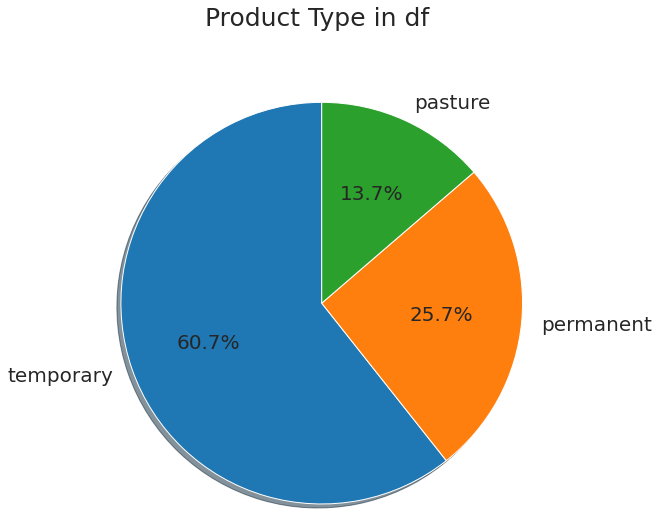

In [16]:
plt.figure(figsize=(8,8))
plt.title('Product Type in df \n\n',size=25)
plt.pie(df.product_type.value_counts(),labels=df.product_type.value_counts().index,
        autopct='%1.1f%%',shadow=True, startangle=90,
       textprops={'size':20})
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.style.use('default')
plt.show()

## Which is the percentange of the product in the Dataframe?

In [17]:
df['product'].value_counts()

Others       12584
Livestock     4752
Cassava       3848
Corn          3739
Rice          3418
Beans         3414
Cocoa         1801
Palm oil       521
Soy            334
Açaí           291
Sorghum          7
Name: product, dtype: int64

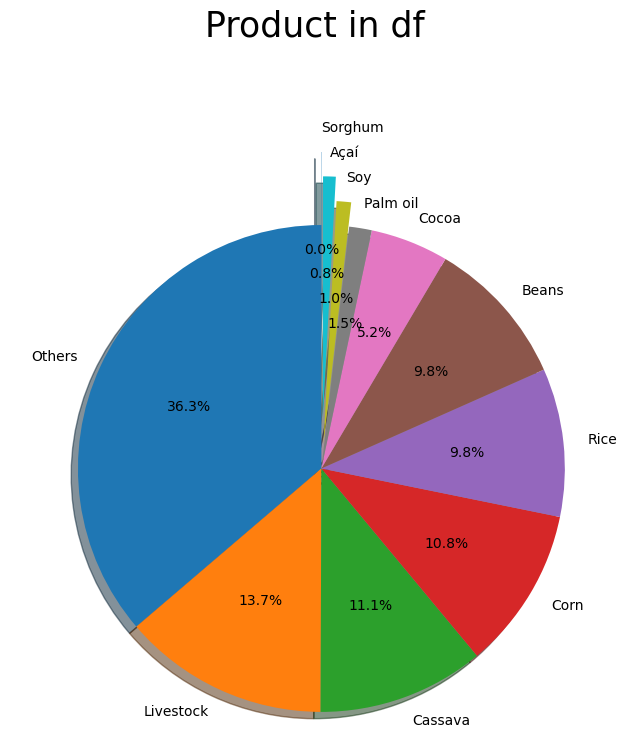

In [18]:
plt.figure(figsize=(8,8))
plt.title('Product in df \n\n',size=25)
plt.pie(df['product'].value_counts(),labels=df['product'].value_counts().index,
        explode= [0,0,0,0,0,0,0,0,0.1,0.2,0.3],autopct='%1.1f%%',shadow=True, startangle=90,
       textprops={'size':10})
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.style.use('default')
plt.show()

## Looking for the distribution of the data in the Area

In [19]:
# plt.figure(figsize = (15,5))
# columns = [column for column in df.columns if column!='destinated_area']
# for column, number in zip(columns,range(0,len(columns))):
#   plt.subplot(2,2,number+1)
#   sns.countplot(df.destinated_area,hue=df[column])
# plt.show()

## What are the cities with the most areas of destination for agriculture?

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


ValueError: x and y must have same first dimension, but have shapes (44,) and (33,)

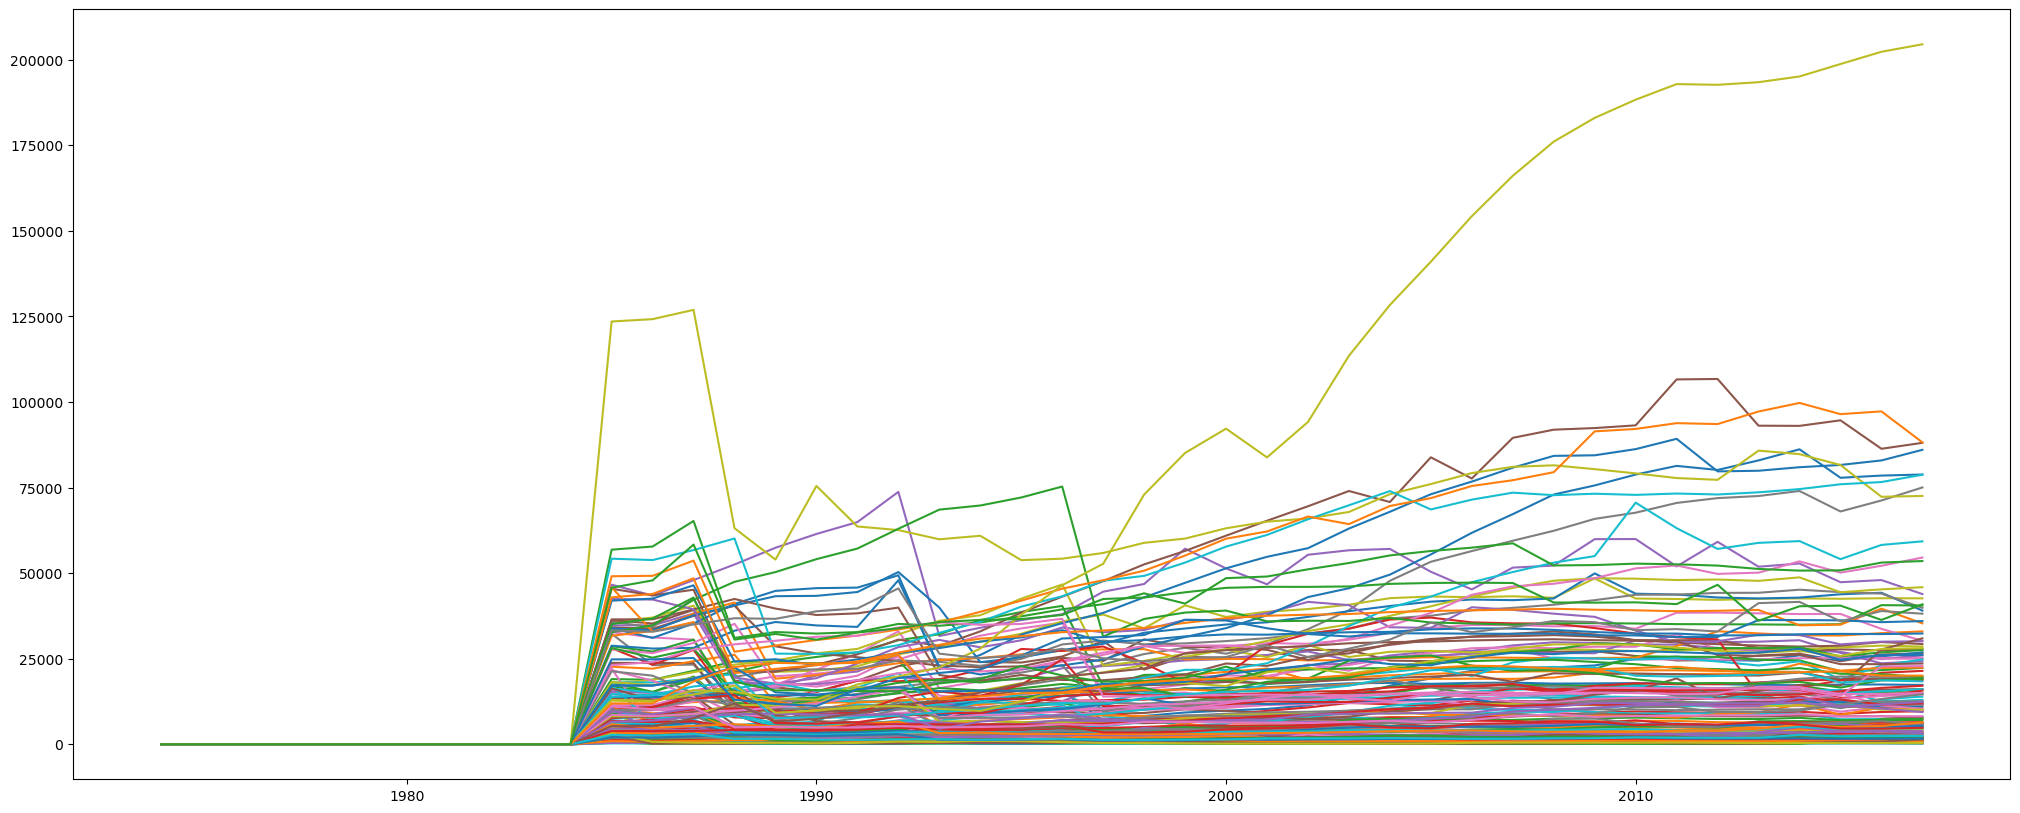

In [52]:
# creating a list of destinated areas for each city troughth the years
cities = df['city_code'].unique()


from statistics import mean

plt.figure(figsize=(25,10))
for i in cities:
    lista = []
    for year in range(1974, 2018, 1):
        try:
            lista.append(mean(df[(df.city_code == i) & (df.year == year)].destinated_area.to_list()))
        except:
            print(df[(df.city_code == i) & (df.year == year)].destinated_area.to_list())
        
    plt.plot(df.year.unique(), lista)
        
plt.title("Amount of lines per year",size=25)
plt.yscale("log")
plt.show()
